## Проект "Статистический анализ данных сервиса аренды самокатов GoFast"

**Цель проекта** – исследовательский анализ и проверка гипотез, которые могут помочь бизнесу вырасти. 

**Задачи проекта**:
- обработка и консолидация данных;
- исследовательский анализ: поиск зависимостей и расчет показателей;
- проверка гипотез.

**Входные данные** — на входе были получены данные мобильного приложения GoFast - сервиса аренды самокатов, данные размещены в 3-х базах _.csv (информация о пользователях, о поездках, о подписках).

В процессе работы над проектом будут реализованы следующие **шаги:**
1. загрузка и знакомство с данными
2. предобработка данных
  - поиск и обработка пропусков и дубликатов
  - изменение типов данных
  - группировка данных
3. исследовательский анализ данных - определение соотношений и долей по разным параметрам
  - данных о пользователях
  - данных о поездках (средние значения параметров и диапазоны)
  - доли пользователей с подпиской и без
4. создание единого датафрейма (объединение данных)
5. расчет экономических показателей (выручка)
6. формулирование и проверка гипотез - необходимо проверить гипотезы перед проведением акций отделом продаж  

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats as st

### Загрузка данных

In [2]:
#загружаем данные

data_users = pd.read_csv('users_go.csv')
data_rides = pd.read_csv('rides_go.csv')
data_subs = pd.read_csv('subscriptions_go.csv')

In [3]:
#посмотрим как выглядят таблицы

display(data_users.head(10))
display(data_rides.head(10))
data_subs.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Из таблиц видно, что наименование столбцов понятно и не требует изменений, таблицы можно объединить, так как есть одинаковые столбцы. Таблица №3 имеет всего 2 строки, является информативной и будет использована в дальнейшем для расчетов. Представлены разные типы данных, которые нужно проверить. Нет пропусков в первых строках, но это также требует проверки.

In [4]:
# также посмотрим общую информацию по таблицам

display(data_users.info())
display(data_rides.info())
data_subs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Нулевых значений нет, тип данных указан неверно только во 2 таблице в столбце `date`

**Вывод по разделу 1.1**

Данные по 3 таблицам загружены, сформирована общая информация о них. 

При первом приближении отметим, что наименование столбцов понятно, без пробелов, верно описывает представленные данные в соотетствующем столбце. Представлены разные типы данных, в одном столбце тип указан неверно, требуется изменить. Отсутствуют незаполненные ячейки в данных.

### Предобработка данных

#### Изменение типа данных
Требуется изменить тип данных на datetime в табл.2 в столбце `date`

In [5]:
data_rides['date'] = pd.to_datetime(data_rides['date'],format='%Y-%m-%d')

data_rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


#### Создание нового столбца
Создадим столбец с указанием месяца из даты (табл.2)

In [6]:
data_rides['month'] = data_rides['date'].dt.month

data_rides.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Также можем посмотреть за какой год представлены данные в таблице 2. Это важно, так как далее мы будем делать агрегацию по месяцам.

In [7]:
data_rides['date'].dt.year.unique()

array([2021], dtype=int64)

В таблице данные только за 2021 г.

#### Пропуски и дубликаты
Мы уже определили, что в таблицах нет пропущенных значений. Можно еще раз в этом убедиться другм способом.

Также проверим таблицы на явные и неявные дубликаты.

In [8]:
# проверим на пропуски

display(data_users.isna().sum())
display(data_rides.isna().sum())
data_subs.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

In [9]:
#явные дубликаты

display(data_users.duplicated().sum())
data_rides.duplicated().sum()

31

0

В таблице с пользователями есть дубликаты. Так как у каждого пользователя есть уникальный id, то эти дубликаты не могут быть полными совпадениями по остальным данным (например, совпали и имя, и город, и возраст), поэтому удалим данные дубликаты.

In [10]:
data_users = data_users.drop_duplicates() #1565 строк было, минус 31 дубликат, стало 1534

#data_users.duplicated().sum()

Неявные дубликаты могут встретиться  в столбцах с именами, городом и типом подписки. Имена менять нам не нужно, так как мы будем работать с `user_id`, а остальные столбцы проверим.

In [11]:
data_users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [12]:
data_users['subscription_type'].unique()

array(['ultra', 'free'], dtype=object)

Неявных дубликатов не выявлено, наименования подписки в таблице 1 совпадает с таблицей 3.

**Вывод по разделу 1.2**

Данные по всем 3-м таблицам обработаны: 
- изменен тип данных в столбце `date` на datetime;
- выявлены и удалены полные дубликаты (31 дубликат в таблице `data_users`);
- неявные дубликаты не выявлены;
- добавлен дополнительный столбец `month` в `data_rides` для дальнейшей группировки данных по месяцам;
- данные представлены только за 2021г.

### Исследовательский анализ данных

#### Частота встречаемости городов
Посмотрим на количество пользователей из разных городов.

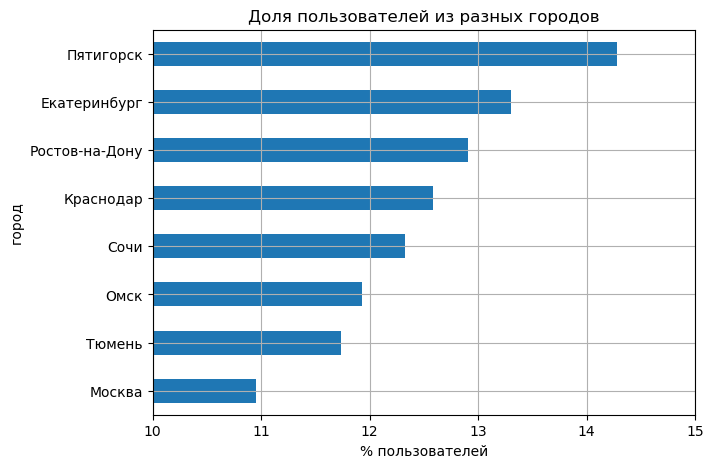

In [13]:
(data_users['city'].value_counts()/data_users['city'].count()*100).sort_values().plot.barh(xlim=(10,15),figsize=(7,5),grid=True)

plt.title('Доля пользователей из разных городов')

plt.xlabel('% пользователей')
plt.ylabel('город')

plt.show()

Больше всего встречаются пользователи из Пятигорска (около 14.5%), меньше всего из Москвы (~11%). В целом можно сказать, что данные распределены достаточно равномерно по городам.

#### Соотношение пользователей с подпиской и без подписки

Сгруппируем данные по столбцу 'subscription_type', в нем пользователи без подписки отмечены free, с подпиской ultra.


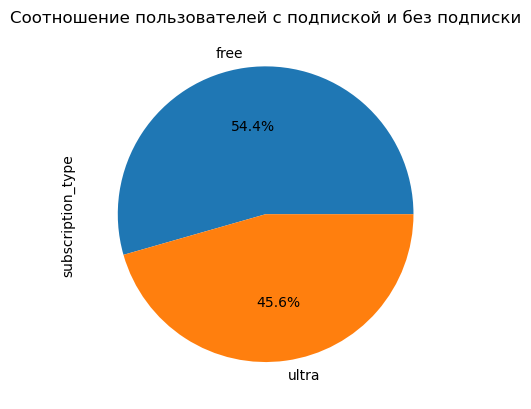

In [14]:
data_users['subscription_type'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

Можно сделать вывод, что чуть больше половины пользователей используют приложение без подписки.

#### Возраст пользователей

Посмотрим на распределение возраста пользователей.

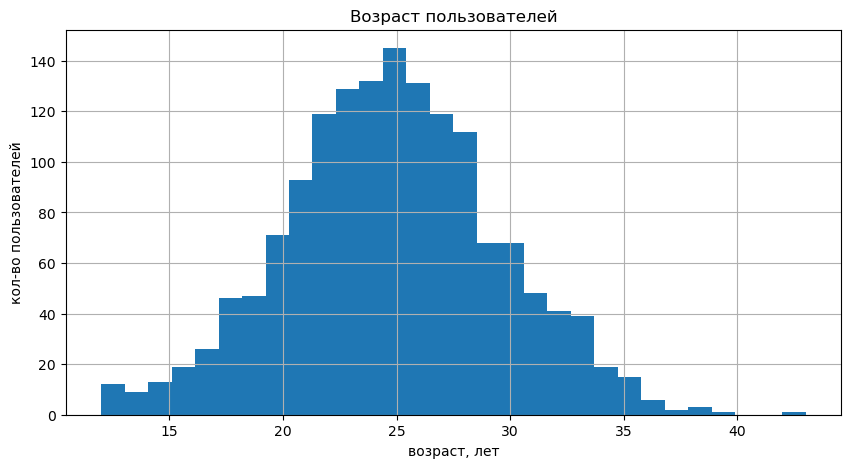

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [15]:
data_users['age'].hist(bins=30,figsize=(10,5),grid=True)

plt.title('Возраст пользователей')

plt.xlabel('возраст, лет')
plt.ylabel('кол-во пользователей')
plt.show()

data_users['age'].describe()

Большинство пользователей в возрасте 22-28 лет. Минимальный возраст - 12 лет, максимальный - 43 года.

Стоит также уточнить у владельца базы данных нижнюю границу возраста, так как большинством сервисов самокатов разрешено пользоваться с 14 лет. В нашей базе присутствует несколько пользователей малдше 14 лет. Возможно это поможет улучшить сервис или найти в нем баг по регистрации по возрасту.

In [16]:
#(data_users['age']<14).value_counts() 12 пользоватлей возрастом ниже 14 лет.

#### Проверка данных о расстоянии и продолжительности поездок.

В этом блоке используем данные таблицы 2. 

Прежде чем рассчитать расстояние и продолжительность, проверим данные таблицы, используя скорость. Добавим столбец 'speed'. Если скорость окажется слишком высокой, значит, есть ошибка в данных в расстоянии или продолжительности поездки.

In [17]:
data_rides['speed'] = (data_rides['distance']/1000)/(data_rides['duration']/60)

data_rides['speed'].describe()

count    18068.000000
mean        13.785261
std         44.156189
min          0.005133
25%          8.127843
50%         10.251135
75%         12.929800
max        865.320929
Name: speed, dtype: float64

Мы видим, что есть неадекватно большая скорость, посмотрим на строки, скорость которых более 100 км/ч (теоретическая скорость, которую может развить самокат)

In [18]:
data_rides[data_rides['speed']>100]

,user_id,distance,duration,date,month,speed
6531,701,4196.445201,0.5,2021-08-31,8,503.573424
6570,704,4830.824371,0.5,2021-10-14,10,579.698925
6680,712,4684.004397,0.5,2021-03-04,3,562.080528
6695,713,5215.642710,0.5,2021-02-25,2,625.877125
6768,718,5197.436649,0.5,2021-02-11,2,623.692398
...,...,...,...,...,...,...
17004,1460,5531.335845,0.5,2021-01-19,1,663.760301
17242,1477,6724.932981,0.5,2021-01-12,1,806.991958
17314,1483,4445.481070,0.5,2021-03-06,3,533.457728
17505,1496,5722.551787,0.5,2021-02-14,2,686.706214


Видно, что в столбце 'duration' явная ошибка. При исследовании данных о продолжительности это нужно будет учесть, а также передать информацию владельцам данных для поиска и исправления ошибки.

#### Расстояние, которое пользователь преодолел за одну поездку

Посмотрим на распределение расстояний одной поездки. 

Для начала построим диаграмму размаха и описание.

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

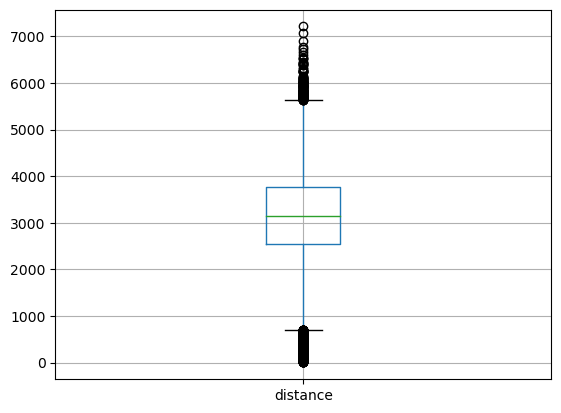

In [19]:
data_rides.boxplot(column=['distance'])

data_rides['distance'].describe()

Среднее и медиана не сильно отличаются, но мы видим, что есть выбросы как за верхней, так и за нижней границей.

Сформируем гистограмму по расстояниям одной поездки.

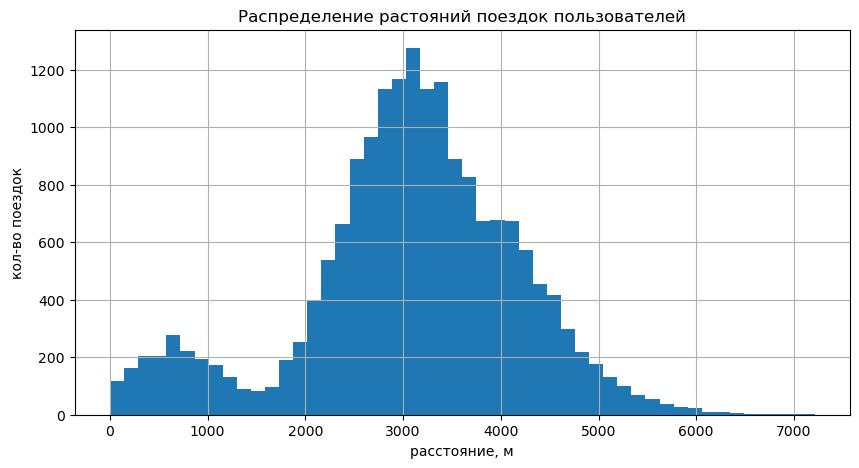

In [20]:
data_rides['distance'].hist(bins=50,figsize=(10,5),grid=True)

plt.title('Распределение растояний поездок пользователей')

plt.xlabel('расстояние, м')
plt.ylabel('кол-во поездок')
plt.show()

Отметим, что на гистограмме есть 2 пика. Первый пик указывает на то, что среди поездок на короткие расстояния чаще всего расстояние составляет около 500м. В целом чаще всего пользователи совершают поездку на расстояние около 3 км.

#### Продолжительность поездок

Посмотрим на распределение продолжительностей одной поездки. Так как мы выяснили, что есть ошибка в данных, исключим ошибочные строки из анализа. Далее построим диаграмму размаха и описание.

count    17973.000000
mean        17.896480
std          5.975424
min          2.035632
25%         13.670439
50%         17.714122
75%         21.747016
max         40.823963
Name: duration, dtype: float64

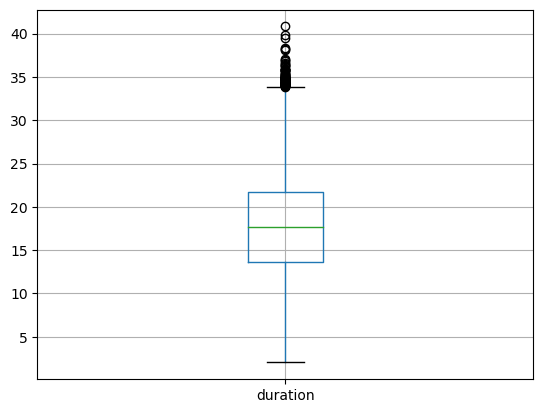

In [21]:
data_rides_new = data_rides.query('speed<100')

data_rides_new.boxplot(column=['duration'])

data_rides_new['duration'].describe()

Среднее и медиана практически не отличаются, есть выбросы за верхней границей.

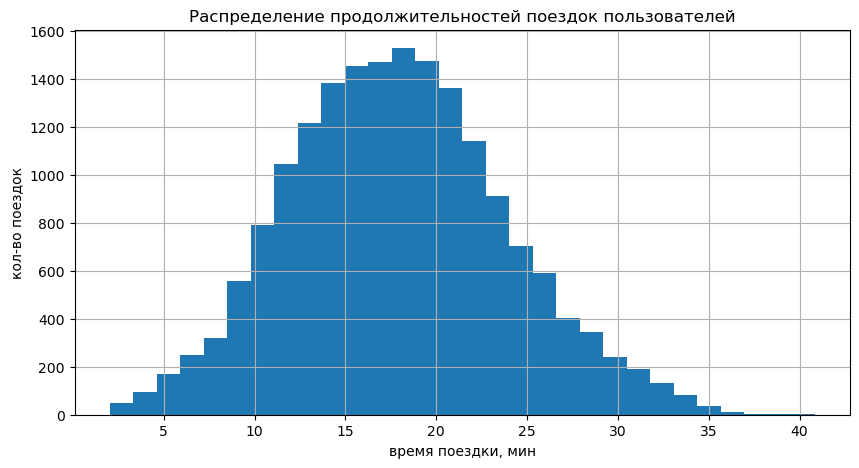

In [22]:
data_rides_new['duration'].hist(bins=30,figsize=(10,5),grid=True)

plt.title('Распределение продолжительностей поездок пользователей')

plt.xlabel('время поездки, мин')
plt.ylabel('кол-во поездок')
plt.show()

Чаще всего продолжительность одной поездки составляет 15-20 минут.

**Вывод по разделу 1.3**

По результатам исследовательского анализа можно сделать следующие выводы:
- в представленной базе данных больше всего пользователей из Пятигорска (около 14,5%), меньше всего из Москвы (11%). В целом можно сказать, что данные распределены достаточно равномерно по городам, в базе данных всего представлены 8 городов;
- 54,4% пользователей не подключают подписку в приложении;
- основная возрастная группа пользователей в возрасте 22-28 лет. Минимальный возраст - 12 лет, максимальный - 43 года;
- чаще всего пользователи совершают поездку на расстояние около 3 км;
- продолжительность одной поездки составляет  в большинстве случаев 15-20 минут.

Важно отметить, что в процессе анализа выявлены некоторые особенности и ошибки, о которых необходимо сообщить владельцам баз данных:
- обнаружены ошибки в данных по продолжительности поездки - 95 строк с продолжительностью 0,5 минут при большом расстоянии;
- уточнить нижнюю границу возраста, с которого можно пользоваться услугами сервиса. В базе присутствует 12 пользователей младше 14 лет.

### Объединение данных

#### Создание общего датафрейма

Объединим все 3 таблицы в одну базу.

In [23]:
data = data_users.merge(data_rides,on='user_id', how='left')

data_total = data.merge(data_subs,on='subscription_type', how='left')

In [24]:
#посмотрим на итоговую таблицу

data_total.head()

,user_id,name,age,city,subscription_type,distance,duration,date,month,speed,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,10.335841,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,9.929620,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,7.260713,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,8.734644,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,9.202888,6,0,199


#### Создание датафреймов по типу подписки

Создадим 2 датафрейма - с подпиской и без.

In [25]:
data_total_subs = data_total.query('subscription_type == "ultra"')

data_total_no_subs = data_total.query('subscription_type == "free"')

#### Распределение расстояний и продолжительности поездок в разрезе типа подписки. Визуализация.

Посмотрим на **распределение расстояний** поездок пользователей этих категорий.

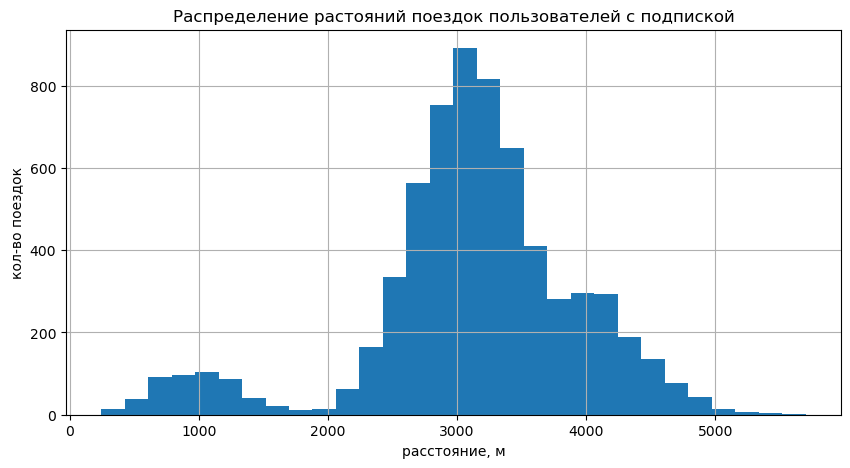

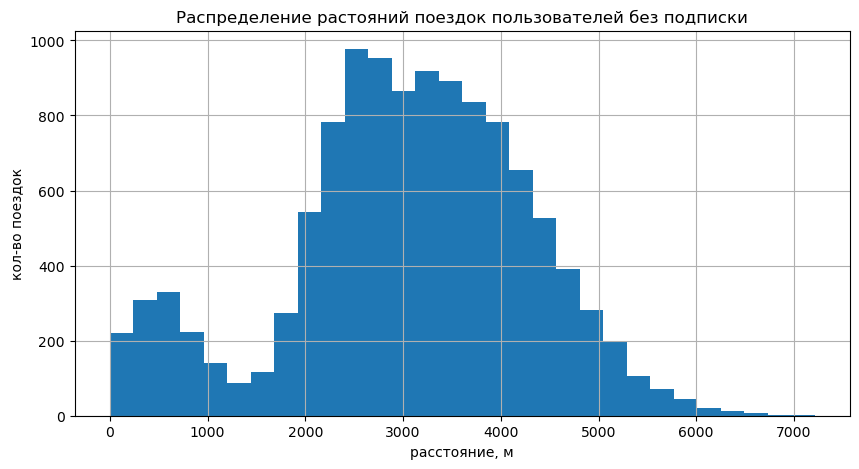

In [26]:
data_total_subs['distance'].hist(bins=30,figsize=(10,5),grid=True)

plt.title('Распределение растояний поездок пользователей с подпиской')

plt.xlabel('расстояние, м')
plt.ylabel('кол-во поездок')
plt.show()

data_total_no_subs['distance'].hist(bins=30,figsize=(10,5),grid=True)

plt.title('Распределение растояний поездок пользователей без подписки')

plt.xlabel('расстояние, м')
plt.ylabel('кол-во поездок')
plt.show()

Для наглядности построим гистограммы на одном графике.

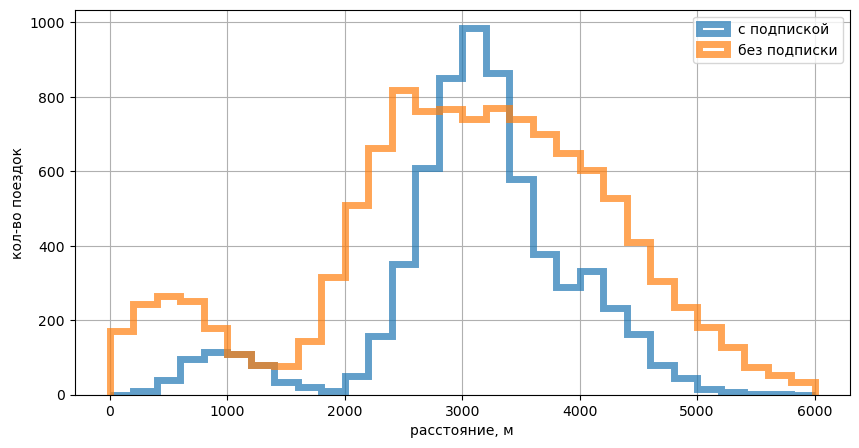

In [27]:
ax = data_total_subs['distance'].plot(
    kind='hist',
    y='distance',
    histtype='step',
    range=(0, 6000),
    bins=30,
    figsize=(10,5),
    linewidth=5,
    alpha=0.7,
    label='с подпиской',
    legend=True
)
data_total_no_subs['distance'].plot(
    kind='hist',
    y='distance',
    histtype='step',
    range=(0, 6000),
    bins=30,
    figsize=(10,5),
    linewidth=5,
    alpha=0.7,
    label='без подписки',
    ax=ax,
    grid=True,
    legend=True
) 

plt.xlabel('расстояние, м')
plt.ylabel('кол-во поездок')
plt.show()

По структуре данные похожи, имеют форму колокола и небольшие дополнительные пики на коротких расстояниях. Здесь следует обратить внимание, что расстояние в 500 м, как наиболее частое на коротких дистанциях (мы отметили его в предыдущем разделе), прежде всего встречается у пользователей без подписки.

Отметим, что у пользователей без подписки более широкий диапазон наиболее частого расстояния - от 2,1 км до 4 км. У пользователей с подпиской более ярко выражено наиболее популярное расстояние в 3 км.

Теперь сравним распределение продолжительностей поездок пользователей этих категорий. Отметим здесь, что ранее при анализе продолжительности мы исключали часть ошибочной информации, здесь также возьмем только срезы данных.

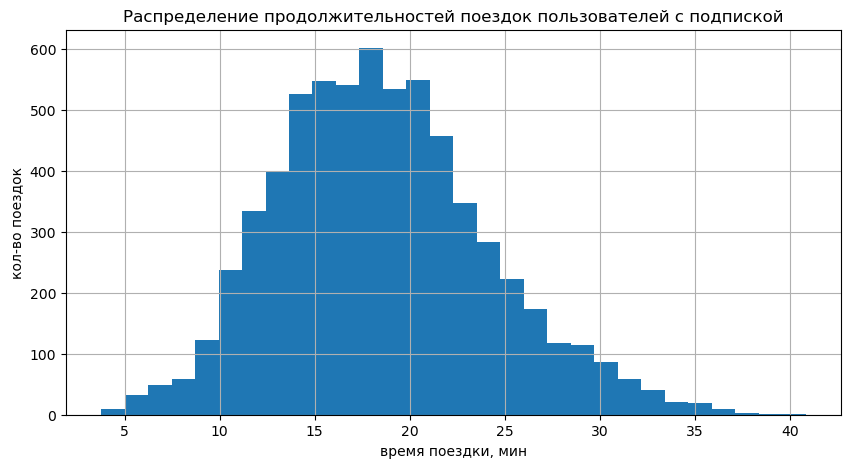

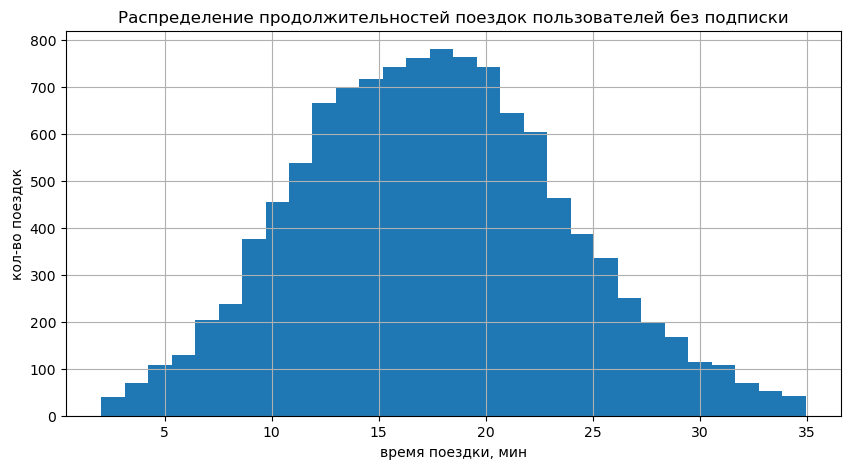

In [28]:
data_total_subs.query('speed<100')['duration'].hist(bins=30,figsize=(10,5),grid=True)

plt.title('Распределение продолжительностей поездок пользователей с подпиской')

plt.xlabel('время поездки, мин')
plt.ylabel('кол-во поездок')
plt.show()

data_total_no_subs.query('speed<100')['duration'].hist(bins=30,figsize=(10,5),grid=True)

plt.title('Распределение продолжительностей поездок пользователей без подписки')

plt.xlabel('время поездки, мин')
plt.ylabel('кол-во поездок')
plt.show()

Распределение по времени похоже у обеих категорий пользователей. Наиболее частая продолжительность поездки - 15-20 мнут. У гистограммы пользователей с подпиской более выражен пик в 17 мин., у гистограммы без подписки более правильная плавная форма колокола.

**Вывод по разделу 1.4**

В данном разделе объединены 3 таблицы в один датафрейм. Также сгруппированы данные и сформированы отдельные датафреймы по пользователям с подпиской и без.

Проведен анализ и визуализированы распределения по параметрам поездок в разрезе категорий "с подпиской" и "без подписки".
В целом, распределение расстояний и продолжительности поездок по разным категориям похожи. В категории "с подпиской" более четко выражены самое частое расстояние (3 км) и продолжительность поездок (17 мин).


### Подсчёт выручки

#### Агрегированные данные

Для расчета выручки, так как в формуле используется продолжительность поездки, исключим ошибочные данные. Далее создадим сводную таблицу по месяцам для пользователей с данными для расчета выручки.

In [29]:
data_total_new = data_total.query('speed<100')

data_total_new_pivot = data_total_new.pivot_table(index=['user_id','month','subscription_type'],
    values=['distance','duration'],aggfunc={'distance' : ['sum','count'], 'duration' : 'sum'}).reset_index()

data_total_new_pivot.columns = ['user_id','month','subscription_type','rides','distance_total','duration_total']

data_total_new_pivot.columns #проверим, что все столбцы есть и названы верно

data_total_new_pivot['duration_total'] = data_total_new_pivot['duration_total'].round() #округлим минуты

data_total_new_pivot

,user_id,month,subscription_type,rides,distance_total,duration_total
0,1,1,ultra,2,7027.511294,41.0
1,1,4,ultra,1,754.159807,6.0
2,1,8,ultra,2,6723.470560,45.0
3,1,10,ultra,2,5809.911100,32.0
4,1,11,ultra,3,7003.499363,53.0
...,...,...,...,...,...,...
11295,1534,6,free,2,3409.468534,25.0
11296,1534,8,free,2,7622.453034,47.0
11297,1534,9,free,1,4928.173852,23.0
11298,1534,11,free,4,13350.015305,76.0


##### Расчет выручки

Можно просто внести стоимость по подписке и без, но я создам переменные, которые будут обращаться к таблице, на случай, если нужно будет поменять тарифы и рассчитать, например, прогнозные значения по этой же базе.

In [30]:
#создаем переменные со стоимостями:

ultra_min = data_subs.loc[1,'minute_price']
ultra_start = data_subs.loc[1,'start_ride_price']
ultra_fee = data_subs.loc[1,'subscription_fee']

free_min = data_subs.loc[0,'minute_price']
free_start = data_subs.loc[0,'start_ride_price']
free_fee = data_subs.loc[0,'subscription_fee']

#напишем функцию, которая будет проверять каждую строку и рассчитывать выручку
#(здесь каждая строка это суммарные данные за месяц по пользователю)

def revenue(row):
    
    if row['subscription_type'] == 'ultra':
        
        return ultra_fee+row['rides']*ultra_start+row['duration_total']*ultra_min
    
    if row['subscription_type'] == 'free':
        
        return free_fee+row['rides']*free_start+row['duration_total']*free_min
    
#добавим стобец с выручкой:

data_total_new_pivot['revenue'] = data_total_new_pivot.apply(revenue,axis=1)

data_total_new_pivot

,user_id,month,subscription_type,rides,distance_total,duration_total,revenue
0,1,1,ultra,2,7027.511294,41.0,445.0
1,1,4,ultra,1,754.159807,6.0,235.0
2,1,8,ultra,2,6723.470560,45.0,469.0
3,1,10,ultra,2,5809.911100,32.0,391.0
4,1,11,ultra,3,7003.499363,53.0,517.0
...,...,...,...,...,...,...,...
11295,1534,6,free,2,3409.468534,25.0,300.0
11296,1534,8,free,2,7622.453034,47.0,476.0
11297,1534,9,free,1,4928.173852,23.0,234.0
11298,1534,11,free,4,13350.015305,76.0,808.0


Выручка рассчитана. Преварительно посмотрим сколько заработано на подписке и без.

In [31]:
data_total_new_pivot.pivot_table(index='subscription_type', values='revenue',aggfunc='sum')

,revenue
subscription_type,
free,2182514.0
ultra,1625253.0


Выручка от пользователей без подписки выше, но это связано, скорее всего с тем, что их количество больше. Поэтому рассчитаем среднюю выручку на 1 пользователя помесячно:

In [32]:
# расчет среднего
data_total_new_pivot.groupby('subscription_type')['revenue'].mean()

subscription_type
free     322.523127
ultra    358.538054
Name: revenue, dtype: float64

**Вывод по разделу 1.5**

Использованы данные о размерах оплаты за аренду с подпиской и без. Рассчитана выручка по категориям. Выручка от пользователей без подписки больше, чем от пользователей с подпиской в 1,3 раза. Однако это связано с тем, что пользователей без подписки больше, чем с подпиской.

Средняя выручка по пользователям с подпиской немного выше, чем без подписки, однако далее это будет детально проверено.

### Проверка гипотез

#### Гипотеза 1

Пользователи с подпиской тратят больше времени на поездки.

In [33]:
subs_duration = data_total_subs.query('speed<100')['duration']

no_subs_duration = data_total_no_subs.query('speed<100')['duration']

print(subs_duration.mean().round(2))
no_subs_duration.mean().round(2)

18.54


17.53

Сформулируем одностроннюю гипотезу. Нулевая гипотеза - средние продолжительности поездок по выборкам (с подпиской/без подписки) равны, альтернативная гипотеза - средняя продолжительность поездки с подпиской больше, чем без подписки.

In [34]:
alpha = 0.05

results = st.ttest_ind(subs_duration,no_subs_duration,alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.704468074453899e-28
Отвергаем нулевую гипотезу


**Вывод:** средняя продолжительность поездки с подпиской больше, чем без подписки.

#### Гипотеза 2
Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров.

Сформулируем одностроннюю гипотезу. Нулевая гипотеза - расстояние, которое проезжают пользователи с подпиской за одну поездку = 3130 метров, альтернативная гипотеза - расстояние, которое проезжают пользователи с подпиской за одну поездку, больше 3130 метров.

In [35]:
subs_distance = data_total_subs['distance']

optima_distance = 3130

alpha = 0.05

results = st.ttest_1samp(subs_distance,optima_distance, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


В данном случае p-value получилось больше alpha, что не дает отвергнуть нулевую гипотезу.

**Вывод:** Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров. Однако надо отметить, что разница не очень большая, поэтому следует сообщить об этом и при необходимости изменить расстояние для сравнения и повторить расчеты.

#### Гипотеза 3
Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

Сформулируем одностороннюю гипотезу. Нулевая гипотеза - средние показатели месячной выручки по выборкам (с подпиской/без подписки) равны, альтернативная гипотеза - средняя выручка с подпиской выше, чем без подписки.

In [36]:
sample_ultra = data_total_new_pivot.query('subscription_type == "ultra"')['revenue']
sample_free = data_total_new_pivot.query('subscription_type == "free"')['revenue']

# статистический тест
alpha = 0.05

results = st.ttest_ind(sample_ultra, sample_free, alternative = 'greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.896683338141334e-36
Отвергаем нулевую гипотезу


**Вывод:** Таким образом, средние помесячные выручки по пользователям с подпиской превышают выручки без подписки. Гипотеза №3 подтвердилась.

### Общий вывод

**Цель данного проекта** – провести исследовательский анализ данных и проверить гипотезы, которые могут помочь бизнесу вырасти. 

**Входные данные** — данные мобильного приложения GoFast - сервиса аренды самокатов, в основных данных есть информация о пользователях, их поездках и подписках.

Была проведена предобработка данных в 3-х таблицах. Нулевых значений не обнаружено, тип данных указан неверно только во 2 таблице в столбце `date`, тип данных изменен. Были выявлены и исключены полные дубликаты, неявных дубликатов не обнаружено.

По результатам исследовательского анализа сделаны следующие выводы:

- в базе данных представлены 8 городов, больше всего пользователей из Пятигорска, меньше всего из Москвы;
- 54,4% пользователей не подключают подписку в приложении;
- основная возрастная группа пользователей в возрасте 22-28 лет;
- среднее расстояние поездки варьируется в основном около 3 км, средняя продолжительность поездки от 15 до 20 минут.

**Выявлены особенности и ошибки**, о которых необходимо сообщить владельцам баз данных:

- обнаружены ошибки в данных по продолжительности поездки - 95 строк с продолжительностью 0,5 минут при большом расстоянии;
- в базе присутствует 12 пользователей младше 14 лет, уточнить нижнюю границу возраста.

Далее были объединены все 3 таблицы в одну базу и рассчитана выручка в разрезе пользователей с подпиской и без.

В процессе дальнейшего анализа проверялись 3 гипотезы:

 1. Пользователи с подпиской тратят больше времени на поездки;
 2. Расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает оптимально допустимое (3130 метров);
 3. Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.
    
По результатам исследования и анализа получены следующие результаты:

 1. **Гипотеза №1 подтвердилась.** Средняя продолжительность поездки с подпиской больше, чем без подписки;
 2. **Гипотеза №2 подтвердилась,** однако разница p-value и alpha несущественна, поэтому желательно изменить расстояние для сравнения и повторить расчеты;
 3. **Гипотеза №3 подтвердилась.** Средняя месячная выручка по пользователям с подпиской превышает среднюю выручку от пользователей без подписки. 